<a href="https://colab.research.google.com/github/ratneshmalviya123/DeepLearning/blob/main/xx_iris_deep_learning_classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Example - Iris 

This examples demonstrates the core deep learning model building concepts using the Keras library. The Iris flower dataset is used to build the model and perform classification tasks

### 5.1 Setup

In [ ]:
#Install related libraries for the course. 
#This is a common requirement for all other exampels too

!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 5.9 kB/s 
     |████████████████████████████████| 4.3 MB 52.7 MB/s 
     |████████████████████████████████| 57 kB 6.4 MB/s 
     |████████████████████████████████| 1.7 MB 59.2 MB/s 
     |████████████████████████████████| 439 kB 63.2 MB/s 
     |████████████████████████████████| 65 kB 5.2 MB/s 
     |████████████████████████████████| 6.0 MB 61.7 MB/s 
     |████████████████████████████████| 126 kB 49.4 MB/s 
     |████████████████████████████████| 1.1 MB 63.5 MB/s 
     |████████████████████████████████| 21.5 MB 1.2 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 4.8 MB 11.8 MB/s 
     |████████████████████████████████| 42 kB 851 kB/s 
     |████████████████████████████████| 2.4 MB 51.0 MB/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2342 sha256=50e7235d3ffaf150848aaa4bc04a176d009fa7c40722715f08f268910fa9cd45
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 12.3 MB/s 
     |████████████████████████████████| 965 kB 52.2 MB/s 
     |████████████████████████████████| 3.3 MB 52.4 MB/s 
     |████████████████████████████████| 1.1 MB 53.7 MB/s 
     |████████████████████████████████| 98 kB 8.7 MB/s 


In [ ]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-02-19 22:11:13--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  73.7MB/s    in 1.1s    

2023-02-19 22:11:14 (73.7 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6

In [ ]:
conda install pandas

ValueError: ignored

### 4.2. Prepare Input Data for Deep Learning

Perform the following steps for preparing data

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets


In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load Data and review content
iris_data = pd.read_csv("iris.csv")

print("\nLoaded Data :\n------------------------------------")
print(iris_data.head())

#Use a Label encoder to convert String to numeric values 
#for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])

#Convert input to numpy array
np_iris = iris_data.to_numpy()

#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Loaded Data :
------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Targe

### 4.3. Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [ ]:

from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.4. Training and evaluating the Model

Training the model involves defining various training models and then perform 
forward and back propagation.


Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 5s 60ms/step - loss: 0.8452 - accuracy: 0.7130 - val_loss: 0.6695 - val_accuracy: 0.8148
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.5482 - accuracy: 0.8333 - val_loss: 0.5397 - val_accuracy: 0.8148
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4304 - accuracy: 0.8333 - val_loss: 0.4724 - val_accuracy: 0.8148
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.3643 - accuracy: 0.8519 - val_loss: 0.4395 - val_accuracy: 0.8148
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.3197 - accuracy: 0.8611 - val_loss: 0.4106 - val_accuracy: 0.8148
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2817 - accuracy: 0.9074 - val_loss: 0.4070 - val_accuracy: 0.7778
Epoch 7/10
7/7 [==============================] - 0s 12ms/step - loss: 0.2739 - accuracy: 0.8796 - val_loss: 

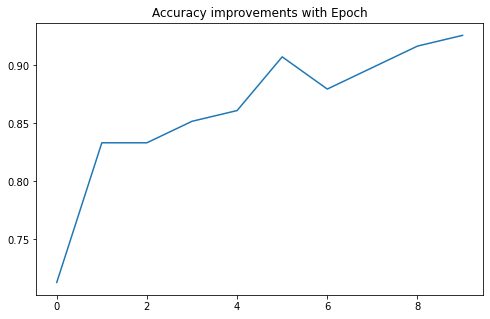


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 35ms/step - loss: 0.1624 - accuracy: 0.8667


[0.16242949664592743, 0.8666666746139526]

In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

### 4.5. Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [ ]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.6. Predictions with Deep Learning Models

In [ ]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


1/1 [==============================] - 0s 21ms/step
Raw Prediction Output (Probabilities) : [[0.01938654 0.59461254 0.38600096]]
Prediction is  ['versicolor']
